## Dataset generation

In [34]:
from random import Random
SEED = 5
random_gen = Random(x = SEED)
def generate_pts(N = 1000):
    return(
        [random_gen.uniform(a = 0, b = 1) for _ in range(N)],
        [random_gen.uniform(a = 0, b = 1) for _ in range(N)]
    )

In [35]:
data_x, data_y = generate_pts()
print(data_x[:10])
print(data_y[:10])

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]
[0.8713187027692235, 0.039767712548386625, 0.5888551653281111, 0.11745374212114823, 0.721120830858009, 0.6113236281477744, 0.6120458139259322, 0.22152129960368494, 0.9490212551961823, 0.11102495123278444]


## Dataset visualisation

C:\Users\ayaey\AppData\Local\Temp\ipykernel_6160\561379243.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


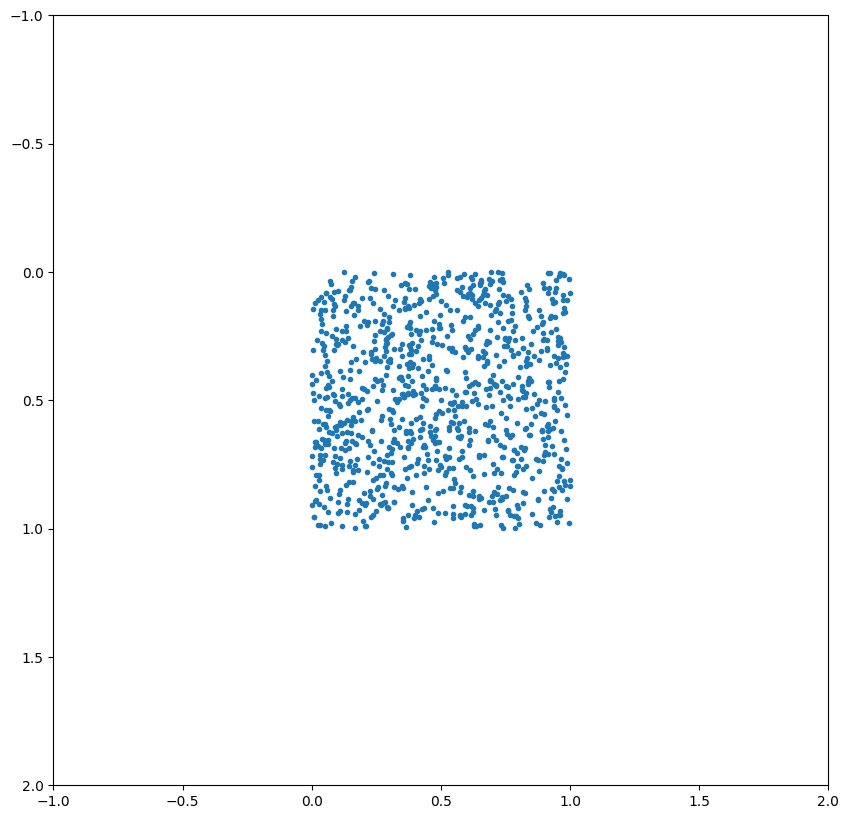

In [45]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x = data_x, y = data_y, marker = '.')
ax.set_xlim(left = -1, right = 2)
ax.set_ylim(top = -1, bottom = 2)

fig.show()

## Loss function definition (Euclidean distance)

In [55]:
from math import sqrt
def loss(x_p, y_p):
    return (1/len(data_x))*sum(
        [sqrt((x_i - x_p)**2+(y_i - y_p)**2) for x_i, y_i in zip(data_x, data_y)]
    )

### Zip function

In [51]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b)

#use the tuple() function to display a readable version of the result:

print(tuple(x))

(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))


In [52]:
lis1 = [1,2,3,4]
lis2 = [5,6,7,8]
print(tuple(zip(lis1, lis2)))

((1, 5), (2, 6), (3, 7), (4, 8))


## Loss function visualization on the solution's 2D space 

In [56]:
STEP = 0.01
MESH_SIZE = 300
x_mesh = y_mesh =  [-1+ STEP*i for i in range(MESH_SIZE)]

In [57]:
loss_mesh = [
    [loss(x_curr, y_curr) for x_curr in x_mesh]
    for y_curr in y_mesh
]

C:\Users\ayaey\AppData\Local\Temp\ipykernel_6160\274264554.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


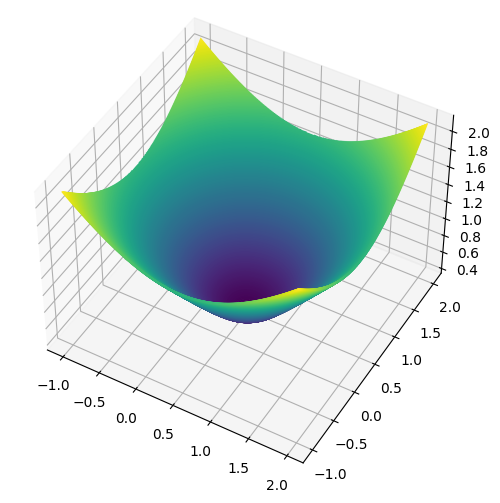

In [67]:
fig = figure(figsize = (6,6))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.contour(x_mesh, y_mesh, loss_mesh, levels = 500)
ax.view_init(elev=45)
fig.show()

## Gradient descent losses visualisation

C:\Users\ayaey\AppData\Local\Temp\ipykernel_6160\3625656463.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


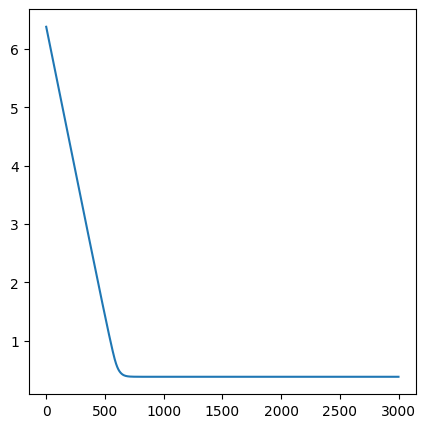

In [74]:
x_p = y_p = 5
EPOCHS = 3000
H = 0.001
DELTA = 0.01
epochs_losses = []

for _ in range(EPOCHS):
    epochs_losses.append(loss(x_p, y_p))
    
    #Using the formal definition of the derivative
    dloss_dx = (loss(x_p+H, y_p) - loss(x_p, y_p))/H
    dloss_dy = (loss(x_p, y_p+H) - loss(x_p, y_p))/H
    
    #updating our solution point
    x_p-= dloss_dx * DELTA   
    y_p-= dloss_dy * DELTA
    
fig = figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(epochs_losses)
fig.show()